In [1]:
import pandas as pd
import numpy as np
import requests
import json
import sqlalchemy as sql
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#user imput will be used for variable coin_id from a list in a widget, for not I set the variable value
coin_id = "bitcoin"

#start start and end times are in Unix for request. will continue to work with datetime function to get end time = now
#and start time = end_time - 100days.  for trial I set variable values
start_time = 1641042000 #2022-01-01 1pmGMT
end_time = 1668208735 #now
url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range?vs_currency=usd&from={start_time}&to={end_time}"
response = requests.get(url)
data = response.json()

timestamp_list = []
price_list = []

for row in data['prices'] :
    timestamp_list.append(datetime.datetime.fromtimestamp(row[0]/1000))
    price_list.append(row[1])
raw_data = {'timestamp': timestamp_list, 'price' : price_list}
df = pd.DataFrame(raw_data, columns=['timestamp','price'])
pd.options.display.float_format = '{:.2f}'.format
df = df.set_index('timestamp')
df

,price
timestamp,
2022-01-01 16:00:00,47816.08
2022-01-02 16:00:00,47387.21
2022-01-03 16:00:00,46531.14
2022-01-04 16:00:00,45938.02
2022-01-05 16:00:00,43647.15
...,...
2022-11-06 16:00:00,20907.00
2022-11-07 16:00:00,20597.76
2022-11-08 16:00:00,18562.35


In [3]:
#slices the data frame to about 90 days at time of testing. this step can be fixed with datetime parameters
df_slice90 = df.loc['2022-08-11 16:00:00' : '2022-11-11 16:00:00']
df_slice90

,price
timestamp,
2022-08-11 17:00:00,23948.75
2022-08-12 17:00:00,24411.38
2022-08-13 17:00:00,24433.65
2022-08-14 17:00:00,24312.54
2022-08-15 17:00:00,24179.01
...,...
2022-11-06 16:00:00,20907.00
2022-11-07 16:00:00,20597.76
2022-11-08 16:00:00,18562.35


<AxesSubplot:title={'center':'Daily Price of bitcoin over past 90 days'}, xlabel='timestamp'>

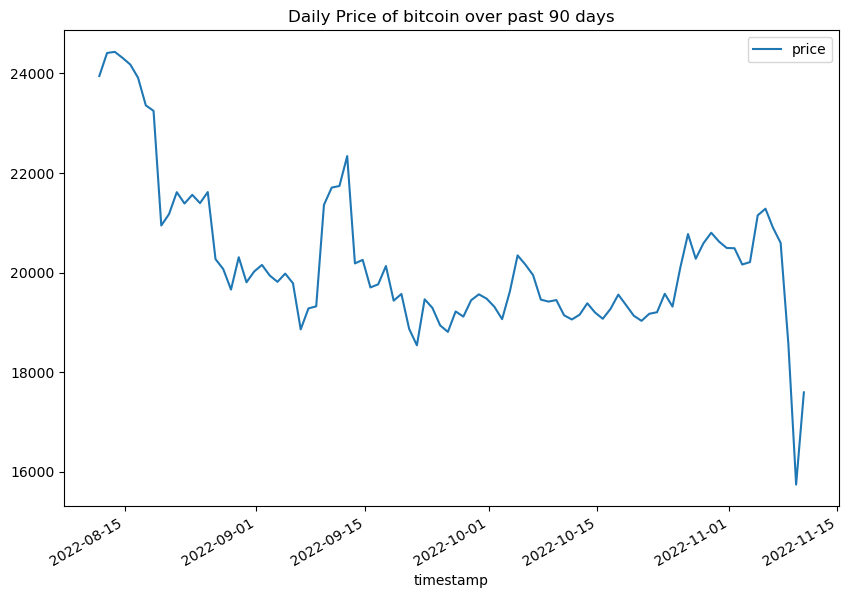

In [4]:
df_slice90.plot(figsize=(10,7),title=f"Daily Price of {coin_id} over past 90 days")

In [5]:
#calculations of 7,12, and 30 day Simple Moving Average
df_slice90["SMA7"] = df_slice90["price"].rolling(7).mean()
df_slice90.dropna(inplace=True)

df_slice90["SMA12"] = df_slice90["price"].rolling(12).mean()
df_slice90.dropna(inplace=True)

df_slice90["SMA30"] = df_slice90["price"].rolling(30).mean()
df_slice90.dropna(inplace=True)
df_slice90

/Users/evieair/opt/anaconda3/envs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/evieair/opt/anaconda3/envs/testing/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/evieair/opt/anaconda3/envs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,price,SMA7,SMA12,SMA30
timestamp,,,,
2022-09-26 17:00:00,19219.73,19019.27,19311.73,19875.46
2022-09-27 17:00:00,19116.33,19054.47,19262.91,19857.36
2022-09-28 17:00:00,19444.79,19183.78,19236.27,19828.56
2022-09-29 17:00:00,19563.77,19197.99,19188.94,19820.50
2022-09-30 17:00:00,19476.93,19224.42,19192.26,19802.28
2022-10-01 17:00:00,19314.46,19277.92,19170.93,19774.30
2022-10-02 17:00:00,19065.15,19314.45,19187.20,19745.09
2022-10-03 17:00:00,19620.57,19371.71,19277.28,19738.62
2022-10-04 17:00:00,20345.40,19547.29,19350.70,19750.80


<AxesSubplot:title={'center':'bitcoin Daily Price with the Simple moving Average for 7,12, and 30 Days'}, xlabel='timestamp'>

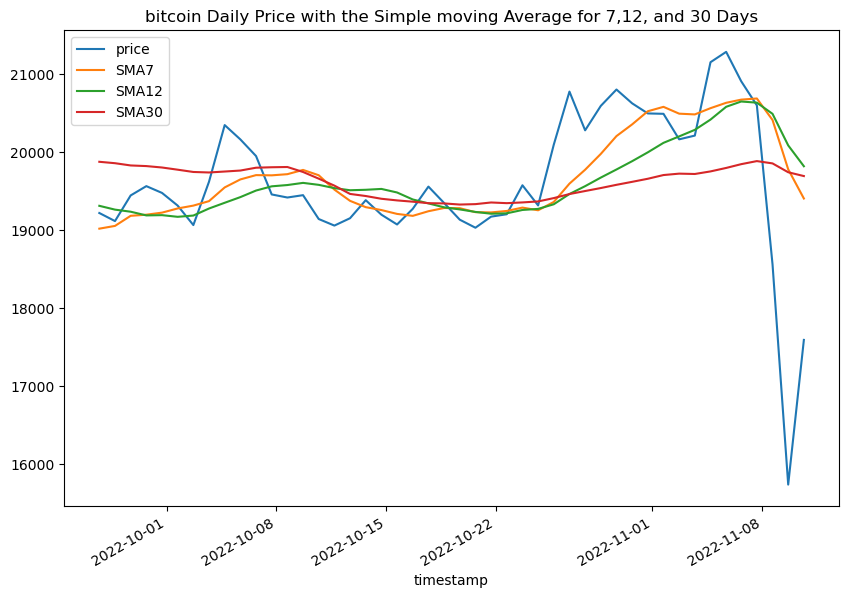

In [6]:
#plot of price with Simple Moving Averages showing how longer timeframe of average smooths out curve
df_slice90.plot(figsize=(10,7), title=f"{coin_id} Daily Price with the Simple moving Average for 7,12, and 30 Days")

In [ ]:
#text significance of Simple Moving Average
print('''
The Simple Moving Average (SMA) is calculated by taking the average price during our time period of analaysis (for this case is 90 days)
and dividing by the number of price data points we have during that time.  It gives you an idea of how the coin is performing in general
over the time period without indicating all the highs and lows.  As you can see the longer the period of our average the smoother
the line.  Because crypto markets are active 24/7 and there is so much activity. Using a shorter timeframe for a moving average
gives you a more accurate picture of coin performance.
'''
      
      

In [8]:
#calculates Weighted Moving Average aka Exponential Moving Average over 7 days
df_slice90["WMA7"] = df_slice90["price"].ewm(7).mean()
df_slice90.dropna(inplace=True)
df_slice90.head()

/Users/evieair/opt/anaconda3/envs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/evieair/opt/anaconda3/envs/testing/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,price,SMA7,SMA12,SMA30,WMA7
timestamp,,,,,
2022-09-26 17:00:00,19219.73,19019.27,19311.73,19875.46,19219.73
2022-09-27 17:00:00,19116.33,19054.47,19262.91,19857.36,19164.58
2022-09-28 17:00:00,19444.79,19183.78,19236.27,19828.56,19270.70
2022-09-29 17:00:00,19563.77,19197.99,19188.94,19820.50,19359.22
2022-09-30 17:00:00,19476.93,19224.42,19192.26,19802.28,19389.43


In [9]:
#creates new df to plot just price and 7 day sma & wma
df_wma = df_slice90[["price", "SMA7", "WMA7"]]
df_wma.head()

,price,SMA7,WMA7
timestamp,,,
2022-09-26 17:00:00,19219.73,19019.27,19219.73
2022-09-27 17:00:00,19116.33,19054.47,19164.58
2022-09-28 17:00:00,19444.79,19183.78,19270.70
2022-09-29 17:00:00,19563.77,19197.99,19359.22
2022-09-30 17:00:00,19476.93,19224.42,19389.43


<AxesSubplot:title={'center':'bitcoin Daily Price vs. 7-Day Simple Moving Average and  7-Day Weighted Moving Average'}, xlabel='timestamp'>

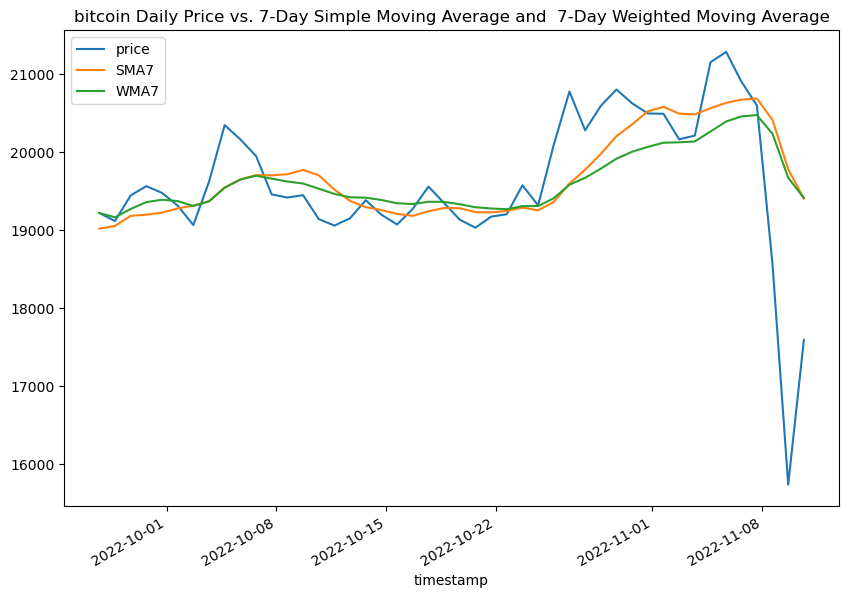

In [10]:
df_wma.plot(figsize=(10,7), title=f"{coin_id} Daily Price vs. 7-Day Simple Moving Average and  7-Day Weighted Moving Average")

In [ ]:
#text significance of Weighted Moving Average
print('''
The Weighted Moving Average (WMA), also called the Exponential Moving Average, uses the SMA in its calculations, but
gives more weight to recent prices in an attempt to make data more responsive to new information. You see in the plot
the green line indicating WMA over 7 days tracks closely to the simple moving average for the first 2/3 of 90 days, but 
then responds quicker to the change in price during the last 1/3 of the 90 days.
'''
      

In [13]:
#functions for calculating the bollinger bands
prices = df_slice90["price"]
rate = 7
prices

def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    sma = get_sma(prices, rate) # <-- Get SMA for 20 days
    std = prices.rolling(rate).std() # <-- Get rolling standard deviation for 20 days
    
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

symbol = coin_id
#df = pdr.DataReader(symbol, 'yahoo', '2014-07-01', '2015-07-01')
#df.index = np.arange(df.shape[0])
closing_prices = df['price']

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

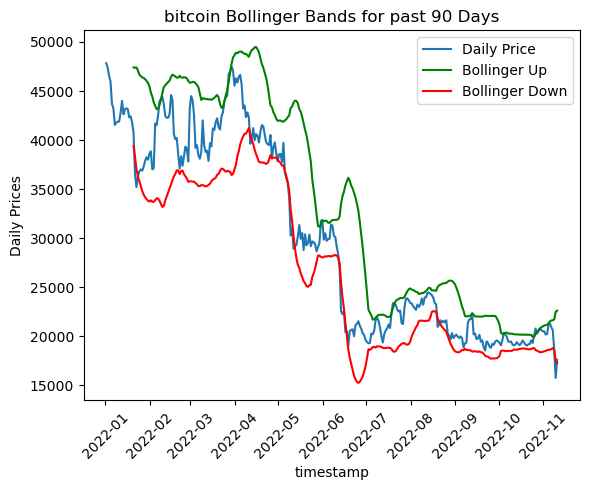

In [15]:
#plots the bollinger bands aling with the price
plt.title(symbol + ' Bollinger Bands for past 90 Days')
plt.xlabel('timestamp')
plt.ylabel('Daily Prices')
plt.plot(closing_prices, label='Daily Price')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.xticks(rotation = 45)
plt.show()


In [ ]:
#text significance of Bollinger Bands
print('''
The Bolliger Bands are often used as indicators of buy/sell opportunities. This technical indicator allows traders
to analyze the volatility of a coin and whether the price is high or low on a relative basis.
The top band is typically two standard deviations above the SMA and the bottom band is typically two standard deviations
below the SMA. This means 95% of the high/low price variation fits between these two bands. You can see how they 
form ribbons around the price.
Areas where the blue price line touches or goes below the red, Bollinger low band, are times you would want to consider
buying opportunities, because the price is lower than 95% of it's usual performance.
Areas where the blue, price line touches or goes above the green, Bollinger hight band, are times you would want to 
consider selling opportunities, because the price is higher than 95% of it's usual performance
'''